***
***
***

<br><h1 style="font-size:300%;">Apprentice Chef Case Study</h1><br><br>
<b>DAT-5303 | Machine Learning</b>
<br>DENIZ GÜRCAN - 4927234<br>
<br> Chase Kusterer<br>
Hult International Business School<br><br><br>

***
***
***

<h3><u> Pre-Analysis </u></h3><br>
In order to conduct the analysis the initial step is to set up the infrastructure to do so. <br>
That means all relevant packages and the dataset have to be imported. <br>
The dataset was supplied in .xslx and is handled accordingly. <br>
After that we call the dataframe's head in order to see whether the import was successful.

In [17]:
# Importing relevant packages
import pandas                  as pd                          # Data Science Essentials
import seaborn                 as sns                         # Data Visualization advanced
import matplotlib.pyplot       as plt                         # Data Visualization
import statsmodels.formula.api as smf                         # smf
import numpy                   as np                          # Math Essentials
import statsmodels.formula.api as smf                         # regression modeling
import sklearn.linear_model
from sklearn.model_selection   import train_test_split        # train/test split
from sklearn.linear_model      import LinearRegression 
from sklearn.ensemble          import GradientBoostingRegressor
from sklearn.preprocessing     import StandardScaler          # standard scaler


# Determining and importing the dataset into Python
file        = 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)


# Defining pd print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# Viewing the first 5 rows (n=5) of the dataset
original_df.head(n = 5)



,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253


<u><h3> Initial data exploration </u></h3><br>
Map out if there are any columns with missing values within the dataset. <br>
At this point of the analysis we do not want to drop any columns yet. <br>
Even though some of the variables might seem not contributing to the overall objective,<br>
they might have an impact and should not be disregarded without further analysis.

In [18]:
# Investigating if there are any missing values
print(original_df.isnull().any())
# The only colums with missing values is Family_Name

# Determining how many missng values Family-Name has
print(original_df['FAMILY_NAME'].isnull().sum())

# Family-Name has 47 missing values and might be excluded from further analysis


REVENUE                         False
CROSS_SELL_SUCCESS              False
NAME                            False
EMAIL                           False
FIRST_NAME                      False
FAMILY_NAME                      True
TOTAL_MEALS_ORDERED             False
UNIQUE_MEALS_PURCH              False
CONTACTS_W_CUSTOMER_SERVICE     False
PRODUCT_CATEGORIES_VIEWED       False
AVG_TIME_PER_SITE_VISIT         False
MOBILE_NUMBER                   False
CANCELLATIONS_BEFORE_NOON       False
CANCELLATIONS_AFTER_NOON        False
TASTES_AND_PREFERENCES          False
MOBILE_LOGINS                   False
PC_LOGINS                       False
WEEKLY_PLAN                     False
EARLY_DELIVERIES                False
LATE_DELIVERIES                 False
PACKAGE_LOCKER                  False
REFRIGERATED_LOCKER             False
FOLLOWED_RECOMMENDATIONS_PCT    False
AVG_PREP_VID_TIME               False
LARGEST_ORDER_SIZE              False
MASTER_CLASSES_ATTENDED         False
MEDIAN_MEAL_

<h1><u> Feature Tuning </u></h1><br>

First we will build the foundation of every model, <br>
which is feature engineering which includes feature- or hyper-parameter-tuning. <br>
This is an essential step since this will reveal underlying issues and patterns within the data, ultimately <br> affecting the quality of the model positively. <br><br>

New features are built and added to the dataset. <br>
Those consist of categorizing the the E-Mails and building dummy variables through one hot encoding. <br>
Furthermore there a variable is built in order to identify the average meal prize, <br>
which might be disregarded for the further analysis but is regarded to reveal insight. <br> <br>

The logarithm of the revenue is built at this early part of the analysis due to: <br>
<ul style="list-style-type:disc;">
  <li>the fact that a lot of variables are counts and exponential which makes a logarithm inevitable for a proper linear regression. </li>
  <li>a possible negative result in the further analysis, if the logarithm is calculated in a later stage.</li>  
</ul>  


<h3><u> E-Mail Categorization </u></h3>

Dividing E-Mail addresses based on their nature and intended usage. <br>
Three categories will be defined professional, private and Spam/Junk. <br><br>
Professional E-Mail-Domains are furthermore divided in subgroups based on the industry the specifics companies <br> operate in in order to reveal differences in the behavior of consumer that work in different environments.
This is of special importance since the company's primary target group are busy professionals. <br>


In [19]:
# First we split the data to make use of it
placeholder_lst = [] # defining an empty list 

# Creation of the for loop going over each value in the E-mail column
for index, col in original_df.iterrows(): 
    
    # Defining the split at the '@'
    email_spl = original_df.loc[index,'EMAIL'].split(sep = '@') 
    # Important to know that the split only works with txt objects
    
    # Filling the placeholder list with the slplit output
    placeholder_lst.append(email_spl)
    

# From list to dataframe 
email_spl_df = pd.DataFrame(placeholder_lst)


#displaying the results
email_spl_df

,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


In [20]:
# Safety Precaution
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')

# Renaming the colum for concatenating
email_spl_df.columns = ['NAME' , 'EMAIL_DOMAIN']

# The Datasets have to be of equal length
original_df = pd.concat([original_df, email_spl_df.loc[:, 'EMAIL_DOMAIN']], # .loc = a safe way to do it
                   axis = 1)

# Viewing the value counts
original_df.loc[: ,'EMAIL_DOMAIN'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
merck.com            28
jnj.com              28
mcdonalds.com        28
nike.com             27
apple.com            27
ibm.com              26
ge.org               26
dupont.com           26
chevron.com          25
microsoft.com        25
exxon.com            24
unitedhealth.com     24
travelers.com        24
boeing.com           23
pg.com               22
mmm.com              22
caterpillar.com      22
verizon.com          22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
homedepot.com        17
intel.com            17
Name: EMAIL_DOMAIN, dtype: int64

In [21]:
# Professional domains splittet into their related industries 
tech_domain      = ['@apple.com', '@cisco.com', '@ibm.com', '@intel.com',
                    '@unitedtech.com', '@verizon.com',
                    '@microsoft.com']

fin_domain       = ['@amex.com', '@goldmansacs.com', '@jpmorgan.com', 
                    '@visa.com' ]

med_domain       = ['@jnj.com', '@unitedhealth.com',  '@pfizer.com', 
                    '@merck.com']

fnb_domain       = ['@mcdonalds.com', '@cocacola.com']

chem_domain      = ['@exxon.com', '@chevron.com',  '@dupont.com']

multi_domain     = ['@caterpillar.com', '@mmm.com', '@walmart.com', 
                    '@pg.com']
 
life_domain      = ['@disney.com', '@homedepot.com', '@nike.com',
                    '@travelers.com']

eng_domain       = ['@boeing.com', '@ge.org']

# Private and Spam/Junk domains
private_domain   = ['@gmail.com', '@yahoo.com', '@protonmail.com']

spam_domain      = ['@me.com', '@aol.com', '@hotmail.com',
                    '@live.com', '@msn.com', '@passport.com']

placeholder_lst = []  

# The loop groups observations by domain type
for domain in original_df['EMAIL_DOMAIN']:
       
        if '@' + domain in tech_domain: 
            placeholder_lst.append('Technology')
        
        elif '@' + domain in fin_domain:
            placeholder_lst.append('Finance') 
        
        elif '@' + domain in med_domain:
            placeholder_lst.append('Pharmaceutical')
        
        elif '@' + domain in fnb_domain:
            placeholder_lst.append('Food_n_Beverage')
        
        elif '@' + domain in multi_domain:
            placeholder_lst.append('Chemistry_Oil')
        
        elif '@' + domain in chem_domain:
            placeholder_lst.append('FMCG_Wholesale')
        
        elif '@' + domain in life_domain:
            placeholder_lst.append('Lifestyle')
        
        elif '@' + domain in eng_domain:
            placeholder_lst.append('Engineering')
        
        elif '@' + domain in private_domain:
            placeholder_lst.append('Private')
            
        elif '@' + domain in spam_domain:
            placeholder_lst.append('Junk')

        else:
            print('Not specified')

In [22]:
# Adding it to the original dataframe by concatonating
original_df['DOMAIN_KIND'] = pd.Series(placeholder_lst)

# Checking how much observations are within each category
original_df['DOMAIN_KIND'].value_counts()

Private            861
Junk               389
Technology         153
Pharmaceutical     100
Lifestyle           89
Finance             87
Chemistry_Oil       87
FMCG_Wholesale      75
Food_n_Beverage     56
Engineering         49
Name: DOMAIN_KIND, dtype: int64

In [23]:
# One Hot encoding the newly created E-Mail Domains into to gain number forfor further analysis

# Creating binary dummies
# One Hot encoding
OH_domain = pd.get_dummies(original_df['DOMAIN_KIND'])

# Drop off columns with the categorial variables
original_df = original_df.drop('DOMAIN_KIND', axis = 1)
original_df = original_df.drop('EMAIL_DOMAIN', axis = 1)

# Combining the data
original_df = original_df.join(OH_domain)


<h3><u> Average Meal Price </u></h3>

The Average Meal Price is calculated based on revenue and therefore not sufficient for the final model. <br>
However it might help to anticipate the revenue of customers within their first year.<br>


In [24]:
# Calculation of AMP
AMP = original_df['REVENUE']/original_df['TOTAL_MEALS_ORDERED']

# Putting it into the dataframe
original_df['AVG_MEAL_PRICE'] = pd.Series(AMP)



<h3><u> Revenue Logarithm </u></h3>

As stated before a, the logarithm of the Revenue has to be built in to built a linear regression with the data on hand.

In [25]:
# Adding the log revenue before analysing the data
original_df['LOG_REVENUE'] = np.log(original_df["REVENUE"])

In [26]:
# Calling the head of the df to check if everything worked
original_df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,Chemistry_Oil,Engineering,FMCG_Wholesale,Finance,Food_n_Beverage,Junk,Lifestyle,Pharmaceutical,Private,Technology,AVG_MEAL_PRICE,LOG_REVENUE
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,0,0,0,0,0,1,0,0,0,0,15.932203,7.539027
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,0,0,0,0,0,0,0,1,0,0,33.977273,7.309881
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,0,0,0,0,0,0,0,0,1,0,67.697368,7.852633
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,0,0,0,0,0,0,0,0,0,1,21.671053,7.406711
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,0,0,0,1,0,0,0,0,0,0,29.584615,7.561642


<h3><u> Outlier Analysis </u></h3><br>

Next we create plots to clearly identify outlier within the variables throughout the dataset. 
In order to reduce the code, a loop has been build to plot histograms which will not be run to decrease processing time. 
For that purpose we need to define the variables that we want to use.
Based on the plots and looking at upper limits we built boundaries that will be added to the dataset within new columns and variables.

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

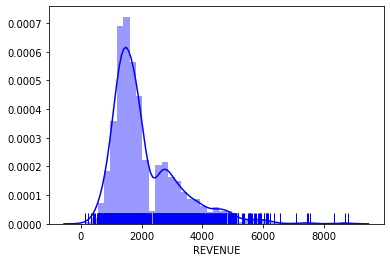

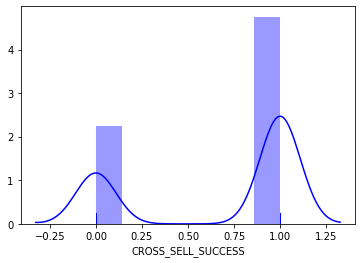

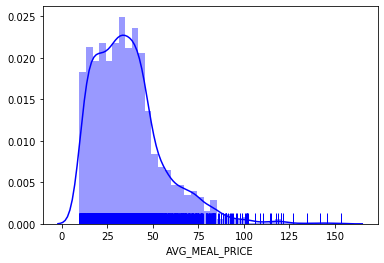

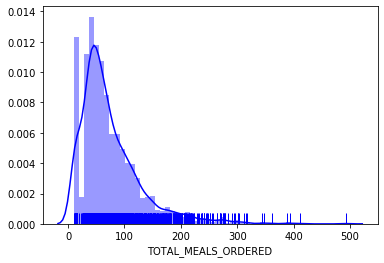

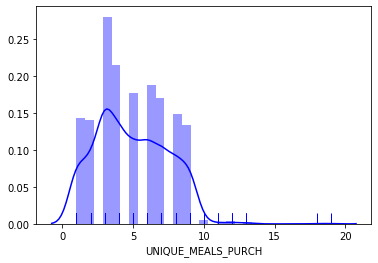

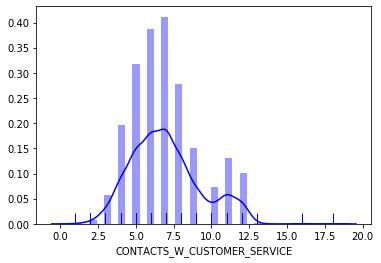

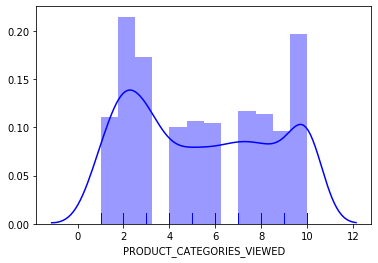

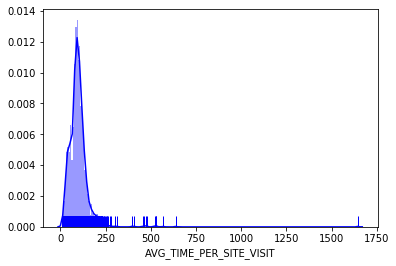

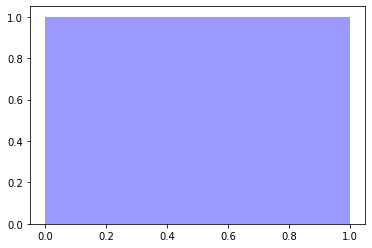

In [27]:
# Defining a list of the variales in order to mae the loop work
#Running the plots without variables that do not contribute to revenue as of common sense
#Those are: 'NAME','EMAIL','FIRST_NAME','FAMILY_NAME'

variable_lst = ['REVENUE',
                'CROSS_SELL_SUCCESS',
                'AVG_MEAL_PRICE',
                'TOTAL_MEALS_ORDERED', 
                'UNIQUE_MEALS_PURCH',
                'CONTACTS_W_CUSTOMER_SERVICE', 
                'PRODUCT_CATEGORIES_VIEWED',
                'AVG_TIME_PER_SITE_VISIT',
                'MOBILE_NUMBER', 
                'CANCELLATIONS_BEFORE_NOON',
                'CANCELLATIONS_AFTER_NOON', 
                'TASTES_AND_PREFERENCES', 
                'MOBILE_LOGINS',
                'PC_LOGINS', 
                'WEEKLY_PLAN', 
                'EARLY_DELIVERIES', 
                'LATE_DELIVERIES',
                'PACKAGE_LOCKER', 
                'REFRIGERATED_LOCKER', 
                'FOLLOWED_RECOMMENDATIONS_PCT',
                'AVG_PREP_VID_TIME', 
                'LARGEST_ORDER_SIZE', 
                'MASTER_CLASSES_ATTENDED',
                'MEDIAN_MEAL_RATING', 
                'AVG_CLICKS_PER_VISIT', 
                'TOTAL_PHOTOS_VIEWED',
                'LOG_REVENUE',
                'Technology',
                'Finance',
                'Pharmaceutical',
                'Food_n_Beverage',
                'Chemistry_Oil',
                'FMCG_Wholesale',
                'Lifestyle',
                'Engineering',
                'Private',
                'Junk']

# The loop goes over all variables and plots them
for h in variable_lst:
            fig, ax = plt.subplots(figsize = (6, 4))
            sns.distplot(original_df[h],
                         bins  = 'fd',
                         kde  = True,
                         rug  = True,
                         color = 'b')
            plt.xlabel(h)
            


In [ ]:
# Identifying the value counts and quantiles

for i in variable_lst:
        print(i, original_df[i].quantile(.95))

print("__________")

for d in variable_lst:
    print(i, original_df[i].value_counts())

In [ ]:
# Creating the thresholds
REVE_hi       = 4000 
AMP_lo        = 10
AMP_hi        = 74
TOMEO_hi      = 187 
UNMEP_hi      = 9
COCUS_lo      = 3
COCUS_hi      = 11
PCV_hi        = 10
ATSV_hi       = 180 
CABEN_lo      = 0
CABEN_hi      = 4
CAAFN_lo      = 0
CAAFN_hi      = 1.1
MOLO_lo       = 4
MOLO_hi       = 6
PCLO_lo       = 0
PCLO_hi       = 2
WEPL_hi       = 45 
ERDE_hi       = 7
LADE_hi       = 8
FOREP_lo      = 10
FOREP_hi      = 80
AVPRVIT_lo    = 75
AVPRVIT_hi    = 245
LAOS_lo       = 2
LAOS_hi       = 7
MACLA_hi      = 2
MEMER_hi      = 4
AVCLV_lo      = 8
AVCLV_hi      = 17
TOPHV_lo      = 25
TOPHV_hi      = 350


#REVENUE
original_df['OUT_REVE'] = 0
condition_hi = original_df.loc[0:,'OUT_REVE'][original_df['REVENUE'] > REVE_hi]
original_df['OUT_REVE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#AVERAGE MEAL PRICE

original_df['OUT_AMP'] = 0
conditioin_hi = original_df.loc[0:, 'OUT_AMP'][original_df['AVG_MEAL_PRICE'] > AMP_hi]
condition_lo = original_df.loc[0:, 'OUT_AMP'][original_df['AVG_MEAL_PRICE'] < AMP_lo]
original_df['OUT_AMP'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_AMP'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#TOTAL_MEALS_ORDERED
original_df['OUT_TOMEO'] = 0
condition_hi = original_df.loc[0:,'OUT_TOMEO'][original_df['TOTAL_MEALS_ORDERED'] > TOMEO_hi]
original_df['OUT_TOMEO'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#PRODUCT_CATEGORIES_VIEWED
original_df['OUT_PCV'] = 0
condition_hi = original_df.loc[0:, 'OUT_PCV'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PCV_hi]
original_df['OUT_PCV'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#UNIQUE_MEALS_PURCH
original_df['OUT_UNMEP'] = 0
condition_hi = original_df.loc[0:, 'OUT_UNMEP'][original_df['UNIQUE_MEALS_PURCH'] > UNMEP_hi]
original_df['OUT_UNMEP'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#CONTACTS_W_CUSTOMER_SERVICE
original_df['OUT_COCUS'] = 0
conditioin_hi = original_df.loc[0:, 'OUT_COCUS'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > COCUS_hi]
condition_lo = original_df.loc[0:, 'OUT_COCUS'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < COCUS_lo]
original_df['OUT_COCUS'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_COCUS'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#AVG_TIME_PER_SITE_VISIT
original_df['OUT_ATSV'] = 0
condition_lo = original_df.loc[0:,'OUT_ATSV'][original_df['AVG_TIME_PER_SITE_VISIT'] > ATSV_hi]
original_df['OUT_ATSV'].replace(to_replace = condition_hi,
                                value        = 1,
                                inplace      = True)

#CANCELLATIONS_BEFORE_NOON
original_df['OUT_CABEN'] = 0
condition_hi = original_df.loc[0:, 'OUT_CABEN'][original_df['CANCELLATIONS_BEFORE_NOON'] > CABEN_hi]
conditioin_lo = original_df.loc[0:, 'OUT_CABEN'][original_df['CANCELLATIONS_BEFORE_NOON'] < CABEN_lo]
original_df['OUT_CABEN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_CABEN'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#CANCELLATIONS_AFTER_NOON
original_df['OUT_CAAFN'] = 0
condition_hi = original_df.loc[0:,'OUT_CAAFN'][original_df['CANCELLATIONS_AFTER_NOON'] > CAAFN_hi]
condition_lo = original_df.loc[0:,'OUT_CAAFN'][original_df['CANCELLATIONS_AFTER_NOON'] < CAAFN_lo]
original_df['OUT_CAAFN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_CAAFN'].replace(to_replace  = condition_lo,
                                value      = 1,
                                inplace    = True)
#MOBILE_LOGINS
original_df['OUT_MOLO'] = 0
condition_hi = original_df.loc[0:, 'OUT_MOLO'][original_df['MOBILE_LOGINS'] > MOLO_hi]
condition_lo = original_df.loc[0:, 'OUT_MOLO'][original_df['MOBILE_LOGINS'] < MOLO_lo]
original_df['OUT_MOLO'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_MOLO'].replace(to_replace  = condition_lo,
                                value      = 1,
                                inplace    = True)

#PC_LOGINS
original_df['OUT_PCLO'] = 0
condition_hi = original_df.loc[0:, 'OUT_PCLO'][original_df['PC_LOGINS'] > PCLO_hi]
condition_lo = original_df.loc[0:, 'OUT_PCLO'][original_df['PC_LOGINS'] < PCLO_lo]
original_df['OUT_PCLO'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_PCLO'].replace(to_replace  = condition_lo,
                                value      = 1,
                                inplace    = True)

#WEEKLY_PLAN
original_df['OUT_WEPL'] = 0
condition_hi = original_df.loc[0:,'OUT_WEPL'][original_df['WEEKLY_PLAN'] > WEPL_hi]
original_df['OUT_WEPL'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)

#EARLY_DELIVERIES
original_df['OUT_ERDE'] = 0
condition_hi = original_df.loc[0:,'OUT_ERDE'][original_df['EARLY_DELIVERIES'] > ERDE_hi]
original_df['OUT_ERDE'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)

#LATE_DELIVERIES
original_df['OUT_LADE'] = 0
condition_hi = original_df.loc[0:,'OUT_LADE'][original_df['LATE_DELIVERIES'] > LADE_hi]
original_df['OUT_LADE'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)

#FOLLOWED_RECOMMENDATIONS_PCT
original_df['OUT_FOREP'] = 0
condition_hi = original_df.loc[0:, 'OUT_FOREP'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOREP_hi]
condition_lo = original_df.loc[0:, 'OUT_FOREP'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] < FOREP_lo]
original_df['OUT_FOREP'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_FOREP'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#AVG_PREP_VID_TIME
original_df['OUT_AVPRVIT'] = 0
condition_hi = original_df.loc[0:, 'OUT_AVPRVIT'][original_df['AVG_PREP_VID_TIME'] > AVPRVIT_hi]
condition_lo = original_df.loc[0:, 'OUT_AVPRVIT'][original_df['AVG_PREP_VID_TIME'] < AVPRVIT_lo]
original_df['OUT_AVPRVIT'].replace(to_replace = condition_hi,
                                value       = 1,
                                inplace     = True)
original_df['OUT_AVPRVIT'].replace(to_replace = condition_lo,
                                value       = 1,
                                inplace     = True)

#LARGEST_ORDER_SIZE
original_df['OUT_LAOS'] = 0
condition_hi = original_df.loc[0:, 'OUT_LAOS'][original_df['LARGEST_ORDER_SIZE'] > LAOS_hi]
condition_lo = original_df.loc[0:, 'OUT_LAOS'][original_df['LARGEST_ORDER_SIZE'] < LAOS_lo]
original_df['OUT_LAOS'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_LAOS'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#MASTER_CLASSES_ATTENDED - fromat does not allow clear thresdifficult to determine outliers due to format
original_df['OUT_MACLA'] = 0
condition_hi = original_df.loc[0:,'OUT_MACLA'][original_df['MASTER_CLASSES_ATTENDED'] > MACLA_hi]
original_df['OUT_MACLA'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)

#MEDIAN_MEAL_RATING - difficult to determine outliers due to format
original_df['OUT_MEMER'] = 0
condition_hi = original_df.loc[0:,'OUT_MEMER'][original_df['MEDIAN_MEAL_RATING'] > MEMER_hi]
original_df['OUT_MEMER'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)
#AVG_CLICKS_PER_VISIT
original_df['OUT_AVCLV'] = 0
condition_hi = original_df.loc[0:, 'OUT_AVCLV'][original_df['AVG_CLICKS_PER_VISIT'] > AVCLV_hi]
condition_lo = original_df.loc[0:, 'OUT_AVCLV'][original_df['AVG_CLICKS_PER_VISIT'] < AVCLV_lo]
original_df['OUT_AVCLV'].replace(to_replace  = condition_hi,
                                value        = 1,
                                inplace      = True)
original_df['OUT_AVCLV'].replace(to_replace  = condition_lo,
                                value        = 1,
                                inplace      = True)

#TOTAL_PHOTOS_VIEWED
original_df['OUT_TOPHV'] = 0
condition_hi = original_df.loc[0:, 'OUT_TOPHV'][original_df['TOTAL_PHOTOS_VIEWED'] > TOPHV_hi]
condition_lo = original_df.loc[0:, 'OUT_TOPHV'][original_df['TOTAL_PHOTOS_VIEWED'] < TOPHV_lo]
original_df['OUT_TOPHV'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_TOPHV'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)



<h3><u> Trend-Based Analysis </u></h3>

Similar to the process of outlier identification and building the thresholds, we now focus on changes of Trends within the data. <br>
Therefore we plot scatter plots and look where the data points are prawn to make sudden changes. <br>
Those areas might be indicators reaching limits, over/under saturation, overall acceptance or usage at all. 


In [ ]:
# Creating Scatter plots in order to identify changes in Trends using the same variables list

for s in variable_lst:
            fig, ax = plt.subplots(figsize = (10, 8))
            plt.subplot(2, 2, 1)
            sns.scatterplot(x = original_df[s],
                            y = original_df['LOG_REVENUE'],
                            color = 'g')
            plt.xlabel(s)

In [ ]:
# Identifying and building trend based changes and thresholds
tomeo_hi    = 250 
tomeo_ch    = 0 
unmep_hi    = 9
cocus_hi    = 10
atsv_hi     = 300 
caben_hi    = 5
molo_hi     = 6
pclo_hi     = 2
lade_hi     = 10
avprvit_ch  = 0
avprvit_hi   = 290
wepl_ch     = 0
laos_hi    = 7
macla_hi    = 2
memer_hi    = 4
avclv_lo    = 8
avclv_hi   = 17
tophv_ch    = 0
tophv_hi    = 300


#TOTAL_MEALS_ORDERED
original_df['TOMEO_CHANGE'] = 0
condition_hi = original_df.loc[0:,'TOMEO_CHANGE'][original_df['TOTAL_MEALS_ORDERED'] > tomeo_hi]
condition_ch = original_df.loc[0:,'TOMEO_CHANGE'][original_df['TOTAL_MEALS_ORDERED'] == tomeo_ch]
original_df['TOMEO_CHANGE'].replace(to_replace = condition_hi,
                                   value     = 1,
                                   inplace   = True)
original_df['TOMEO_CHANGE'].replace(to_replace = condition_ch,
                                   value     = 1,
                                   inplace   = True)
#UNIQUE_MEALS_PURCH
original_df['UNMEP_CHANGE'] = 0
condition_hi = original_df.loc[0:,'UNMEP_CHANGE'][original_df['UNIQUE_MEALS_PURCH'] > unmep_hi]
original_df['UNMEP_CHANGE'].replace(to_replace = condition_hi,
                                value        = 1,
                                inplace      = True)

#CONTACTS_W_CUSTOMER_SERVICE
original_df['COCUS_CHANGE'] = 0
condition_hi = original_df.loc[0:,'COCUS_CHANGE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > cocus_hi]
original_df['COCUS_CHANGE'].replace(to_replace  = condition_hi,
                                      value   = 1,
                                      inplace = True)

#AVG_TIME_PER_SITE_VISIT
original_df['ATSV_CHANGE'] = 0
condition_hi = original_df.loc[0:,'ATSV_CHANGE'][original_df['AVG_TIME_PER_SITE_VISIT'] > atsv_hi]
original_df['ATSV_CHANGE'].replace(to_replace = condition_hi,
                                       value   = 1,
                                       inplace = True)

#CANCELLATIONS_BEFORE_NOON
original_df['CABEN_CHANGE'] = 0
condition_hi = original_df.loc[0:,'CABEN_CHANGE'][original_df['CANCELLATIONS_BEFORE_NOON'] > caben_hi]
original_df['CABEN_CHANGE'].replace(to_replace = condition_hi,
                                  value      = 1,
                                  inplace    = True)
#MOLO
original_df['MOLO_CHANGE'] = 0
condition_hi = original_df.loc[0:,'MOLO_CHANGE'][original_df['CANCELLATIONS_BEFORE_NOON'] > molo_hi]
original_df['MOLO_CHANGE'].replace(to_replace = condition_hi,
                                  value      = 1,
                                  inplace    = True)


#PCLO
original_df['PCLO_CHANGE'] = 0
condition_hi = original_df.loc[0:,'PCLO_CHANGE'][original_df['CANCELLATIONS_BEFORE_NOON'] > pclo_hi]
original_df['PCLO_CHANGE'].replace(to_replace = condition_hi,
                                  value      = 1,
                                  inplace    = True)


#LATE_DELIVERIES
original_df['LADE_CHANGE'] = 0
condition_hi = original_df.loc[0:,'LADE_CHANGE'][original_df['LATE_DELIVERIES'] > lade_hi]
original_df['LADE_CHANGE'].replace(to_replace = condition_hi,
                                  value     = 1,
                                  inplace   = True)

#AVG_PREP_VID_TIME
original_df['AVPRVIT_CHANGE'] = 0
condition_hi = original_df.loc[0:,'AVPRVIT_CHANGE'][original_df['AVG_PREP_VID_TIME'] > avprvit_hi]
condition_ch = original_df.loc[0:,'AVPRVIT_CHANGE'][original_df['AVG_PREP_VID_TIME'] == avprvit_ch]
original_df['AVPRVIT_CHANGE'].replace(to_replace = condition_hi,
                                    value     = 1,
                                    inplace   = True)
original_df['AVPRVIT_CHANGE'].replace(to_replace = condition_ch,
                                    value     = 1,
                                    inplace   = True)
# WEEKLY_PLAN
original_df['WEPL_CHANGE'] = 0
condition_ch = original_df.loc[0:,'WEPL_CHANGE'][original_df['WEEKLY_PLAN'] == wepl_ch]
original_df['WEPL_CHANGE'].replace(to_replace = condition_ch,
                                value        = 1,
                                inplace      = True)


#LARGEST_ORDER_SIZE
original_df['LAOS_CHANGE'] = 0
condition_hi = original_df.loc[0:,'LAOS_CHANGE'][original_df['LARGEST_ORDER_SIZE'] > laos_hi]
original_df['LAOS_CHANGE'].replace(to_replace = condition_hi,
                                      value      = 1,
                                      inplace    = True)

#MEDIAN_MEAL_RATING
original_df['MACLA_CHANGE'] = 0
condition_hi = original_df.loc[0:,'MACLA_CHANGE'][original_df['MEDIAN_MEAL_RATING'] > macla_hi]
original_df['MACLA_CHANGE'].replace(to_replace = condition_hi,
                                   value     = 1,
                                   inplace   = True)

#Memer
original_df['MEMER_CHANGE'] = 0
condition_hi = original_df.loc[0:,'MEMER_CHANGE'][original_df['MEDIAN_MEAL_RATING'] > memer_hi]
original_df['MEMER_CHANGE'].replace(to_replace = condition_hi,
                                   value     = 1,
                                   inplace   = True)


#AVG_CLICKS_PER_VISIT
original_df['AVCLV_CHANGE'] = 0
#condition_lo = original_df.loc[0:,'avclv_CHANGE'][original_df['AVG_CLICKS_PER_VISIT'] < avclv_lo]
condition_hi = original_df.loc[0:,'AVCLV_CHANGE'][original_df['AVG_CLICKS_PER_VISIT'] > avclv_hi]
original_df['AVCLV_CHANGE'].replace(to_replace = condition_hi,
                                     value    = 1,
                                     inplace  = True)

#TOTAL_PHOTOS_VIEWED
original_df['TOPHV_CHANGE'] = 0
condition_hi = original_df.loc[0:,'TOPHV_CHANGE'][original_df['TOTAL_PHOTOS_VIEWED'] > tophv_hi]
condition_ch = original_df.loc[0:,'TOPHV_CHANGE'][original_df['TOTAL_PHOTOS_VIEWED'] == tophv_ch]
original_df['TOPHV_CHANGE'].replace(to_replace = condition_hi,
                                     value   = 1,
                                     inplace = True)
original_df['TOPHV_CHANGE'].replace(to_replace = condition_ch,
                                     value    = 1,
                                     inplace  = True)




<h1><u> Linear Regression Modeling </u></h1><br>

After we finished our feature engineering, building new variables, identifying changes and defining the thresholds we will now move to building our models. <br>

This includes the following steps:<br>
<ul style="list-style-type:disc;">
  <li>Securing our original data through building a new dataframe</li>
  <li>Standardizing our variables</li>  
<li>Building a model with all variables</li>
<li>Evaluate and drop variables if needed</li>
<li>Build a variable of models </li>
<li>Identify the best/final model</li>    
</ul>  


<h3><u> Securing the data </u></h3>

We avoid affecting our original data by defining a new dataframe with the variables we have built previously.<br>
In this step we also define the target with is our logarithm Revenue. 

In [ ]:
# declaring set of x-variables
x_variables = ['REVENUE',                      
                'CROSS_SELL_SUCCESS',                                                                                      
                'TOTAL_MEALS_ORDERED',             
                'UNIQUE_MEALS_PURCH',              
                'CONTACTS_W_CUSTOMER_SERVICE',     
                'PRODUCT_CATEGORIES_VIEWED',       
                'AVG_TIME_PER_SITE_VISIT',         
                'MOBILE_NUMBER',                   
                'CANCELLATIONS_BEFORE_NOON',       
                'CANCELLATIONS_AFTER_NOON',        
                'TASTES_AND_PREFERENCES',          
                'MOBILE_LOGINS',                   
                'PC_LOGINS',                       
                'WEEKLY_PLAN',                     
                'EARLY_DELIVERIES',                
                'LATE_DELIVERIES',                 
                'PACKAGE_LOCKER',                  
                'REFRIGERATED_LOCKER',             
                'FOLLOWED_RECOMMENDATIONS_PCT',    
                'AVG_PREP_VID_TIME',               
                'LARGEST_ORDER_SIZE',              
                'MASTER_CLASSES_ATTENDED',        
                'MEDIAN_MEAL_RATING',              
                'AVG_CLICKS_PER_VISIT',            
                'TOTAL_PHOTOS_VIEWED',             
                'Chemistry_Oil',                   
                'Engineering',                     
                'FMCG_Wholesale',                  
                'Finance',                         
                'Food_n_Beverage',                 
                'Junk',                            
                'Lifestyle',                       
                'Pharmaceutical',                  
                'Private',                         
                'Technology', 
                'LOG_REVENUE',
                'AVG_MEAL_PRICE',                  
                'OUT_REVE',                        
                'OUT_AMP',                         
                'OUT_TOMEO',                       
                'OUT_PCV',                         
                'OUT_UNMEP',                       
                'OUT_COCUS',                       
                'OUT_ATSV' ,                       
                'OUT_CABEN',                       
                'OUT_CAAFN',                       
                'OUT_MOLO',                        
                'OUT_PCLO',                        
                'OUT_WEPL',                        
                'OUT_ERDE',                        
                'OUT_LADE',                        
                'OUT_FOREP',                       
                'OUT_AVPRVIT',                     
                'OUT_LAOS',                        
                'OUT_MACLA',                       
                'OUT_MEMER',                       
                'OUT_AVCLV',                       
                'OUT_TOPHV',                       
                'TOMEO_CHANGE',                    
                'UNMEP_CHANGE',                    
                'COCUS_CHANGE',                    
                'ATSV_CHANGE',                     
                'CABEN_CHANGE',                    
                'MOLO_CHANGE',                     
                'PCLO_CHANGE',                     
                'LADE_CHANGE',                     
                'AVPRVIT_CHANGE', 
                'WEPL_CHANGE',
                'LAOS_CHANGE',                     
                'MACLA_CHANGE',                    
                'MEMER_CHANGE',                    
                'AVCLV_CHANGE',                    
                'TOPHV_CHANGE']


# Preparation of a df based on our analysis
original_data = original_df.loc[ : , x_variables]

# Defining the target variable
original_target = original_data.loc[ : , 'LOG_REVENUE'] 

# Calling the head to see if everything was succesful
original_data.head(n = 5)

<h3><u> Standardizing the Data </u></h3>

In order do decrease the variance within our variables we standardize the data through scaling it. <br>
Before scaling our entire data we have to exclude our Y/target variable to avoid changing its values not affecting the model quality. 

In [ ]:
# Creating a StandardScaler() object
scaler = StandardScaler()

# Drop the target variable
org_data = original_data.drop(['LOG_REVENUE'], axis = 1)

# Fit the scaler to the data
scaler.fit(org_data)


# Tranforming the data
X_scaled = scaler.transform(org_data)


# Convert the scaled data into a Dataframe
X_scaled_df = pd.DataFrame(X_scaled)


# View the results
X_scaled_df.describe().round(2)

In [ ]:
# Re-add the column names to the scaled dataframe
X_scaled_df.columns = org_data.columns

# Comparing the variables before and after the scaling
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(org_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")

In [ ]:
scaled_df_explanatory = X_scaled_df.copy()

#scaled_df_explanatory = X_scaled_df.drop(['REVENUE'], axis = 1)

for val in scaled_df_explanatory:
     print(f"X_scaled_df['{val}'] +")

<h3><u> Building a Model </u></h3>

After we scaled our data we are now ready to build our model with all variables. <br>
Before we do that we have to add back the disregarded LOG_revenue variable. <br> <br>

Next the OLS Regression Results will be interpreted and we will select variables for further modeling based on the relevance to the overall objective and their r-squared values. <br>
Even though some of the values might be over .05 we still might consider those variables since they can add value to our models later on.

In [ ]:
# Join back REVENUE
temp_object = original_data['LOG_REVENUE']
X_scaled_df = X_scaled_df.join(temp_object)

# Build a model with all variables except Revenue
lm_best = smf.ols(formula =  """LOG_REVENUE ~ X_scaled_df['CROSS_SELL_SUCCESS'] +
                                X_scaled_df['TOTAL_MEALS_ORDERED'] +
                                X_scaled_df['UNIQUE_MEALS_PURCH'] +
                                X_scaled_df['CONTACTS_W_CUSTOMER_SERVICE'] +
                                X_scaled_df['PRODUCT_CATEGORIES_VIEWED'] +
                                X_scaled_df['AVG_TIME_PER_SITE_VISIT'] +
                                X_scaled_df['MOBILE_NUMBER'] +
                                X_scaled_df['CANCELLATIONS_BEFORE_NOON'] +
                                X_scaled_df['CANCELLATIONS_AFTER_NOON'] +
                                X_scaled_df['TASTES_AND_PREFERENCES'] +
                                X_scaled_df['MOBILE_LOGINS'] +
                                X_scaled_df['PC_LOGINS'] +
                                X_scaled_df['WEEKLY_PLAN'] +
                                X_scaled_df['EARLY_DELIVERIES'] +
                                X_scaled_df['LATE_DELIVERIES'] +
                                X_scaled_df['PACKAGE_LOCKER'] +
                                X_scaled_df['REFRIGERATED_LOCKER'] +
                                X_scaled_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                X_scaled_df['AVG_PREP_VID_TIME'] +
                                X_scaled_df['LARGEST_ORDER_SIZE'] +
                                X_scaled_df['MASTER_CLASSES_ATTENDED'] +
                                X_scaled_df['MEDIAN_MEAL_RATING'] +
                                X_scaled_df['AVG_CLICKS_PER_VISIT'] +
                                X_scaled_df['TOTAL_PHOTOS_VIEWED'] +
                                X_scaled_df['Chemistry_Oil'] +
                                X_scaled_df['Engineering'] +
                                X_scaled_df['FMCG_Wholesale'] +
                                X_scaled_df['Finance'] +
                                X_scaled_df['Food_n_Beverage'] +
                                X_scaled_df['Junk'] +
                                X_scaled_df['Lifestyle'] +
                                X_scaled_df['Pharmaceutical'] +
                                X_scaled_df['Private'] +
                                X_scaled_df['Technology'] +
                                X_scaled_df['AVG_MEAL_PRICE'] +
                                X_scaled_df['OUT_REVE'] +
                                X_scaled_df['OUT_AMP'] +
                                X_scaled_df['OUT_TOMEO'] +
                                X_scaled_df['OUT_PCV'] +
                                X_scaled_df['OUT_UNMEP'] +
                                X_scaled_df['OUT_COCUS'] +
                                X_scaled_df['OUT_ATSV'] +
                                X_scaled_df['OUT_CABEN'] +
                                X_scaled_df['OUT_CAAFN'] +
                                X_scaled_df['OUT_MOLO'] +
                                X_scaled_df['OUT_PCLO'] +
                                X_scaled_df['OUT_WEPL'] +
                                X_scaled_df['OUT_ERDE'] +
                                X_scaled_df['OUT_LADE'] +
                                X_scaled_df['OUT_FOREP'] +
                                X_scaled_df['OUT_AVPRVIT'] +
                                X_scaled_df['OUT_LAOS'] +
                                X_scaled_df['OUT_MACLA'] +
                                X_scaled_df['OUT_MEMER'] +
                                X_scaled_df['OUT_AVCLV'] +
                                X_scaled_df['OUT_TOPHV'] +
                                X_scaled_df['TOMEO_CHANGE'] +
                                X_scaled_df['UNMEP_CHANGE'] +
                                X_scaled_df['COCUS_CHANGE'] +
                                X_scaled_df['ATSV_CHANGE'] +
                                X_scaled_df['CABEN_CHANGE'] +
                                X_scaled_df['MOLO_CHANGE'] +
                                X_scaled_df['PCLO_CHANGE'] +
                                X_scaled_df['LADE_CHANGE'] +
                                X_scaled_df['AVPRVIT_CHANGE'] +
                                X_scaled_df['WEPL_CHANGE'] +
                                X_scaled_df['LAOS_CHANGE'] +
                                X_scaled_df['MACLA_CHANGE'] +
                                X_scaled_df['MEMER_CHANGE'] +
                                X_scaled_df['AVCLV_CHANGE'] +
                                X_scaled_df['TOPHV_CHANGE'] """,
                                data = X_scaled_df)


# Fit the model based on the data
results = lm_best.fit()



# Analyze the summary output
print(results.summary())

<h3><u> Final Model </u></h3>

Having our final set of variables we are now ready to run different types of models.
We will them decide which model gives the best value for our purpose.

The models are:

<ul style="list-style-type:disc;">
  <li>LinearRegression</li>
  <li>Ridge</li>  
<li>Lasso</li>
<li>GradientBoostingRegressor</li>  
</ul> 
<br>
<br>
The model we chose is the gradient boost model. The difference between the training and Testing score indicates that there is noise in the data. 
This exceeds the acceptable range of .05 by .0049. However this is regarded to be acceptable and can be decreased by further hyper-parameter-tuning.

 

In [ ]:
# Defining the set of x-variables
x_variables_clean = ['TOTAL_MEALS_ORDERED',
                     'UNIQUE_MEALS_PURCH',
                     'CONTACTS_W_CUSTOMER_SERVICE',
                     'AVG_PREP_VID_TIME',
                     'LARGEST_ORDER_SIZE',
                     'MASTER_CLASSES_ATTENDED',
                     'MEDIAN_MEAL_RATING',
                     'AVG_CLICKS_PER_VISIT',
                     'OUT_TOMEO',
                     'OUT_PCV',
                     'OUT_MACLA',
                     'COCUS_CHANGE',
                     'TOMEO_CHANGE',
                     'AVPRVIT_CHANGE']

# Response variable data
scaled_df_data = X_scaled_df.loc[:, x_variables_clean]
# Defining the target
scaled_df_target = X_scaled_df.loc[:, 'LOG_REVENUE']

# Preparing the training and testing set
X_train, X_test, y_train, y_test = train_test_split(
            scaled_df_data,
            scaled_df_target,
            test_size = 0.25,
            random_state = 222)

<h3><u> Linear Regression Model </u></h3>


In [ ]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

<h3><u> Ridge Model </u></h3>

In [ ]:
# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

<h3><u> Lasso Model </u></h3>

In [ ]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_model.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

<h3><u> ARD Model </u></h3>

In [ ]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_model.predict(X_test)


print('Training Score:', ard_model.score(X_train, y_train).round(4))
print('Testing Score:',  ard_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(4)
ard_test_score  = ard_model.score(X_test, y_test).round(4)

<h3><u> Gradient Boost Model </u></h3><br>
It runs the model 85 times in order to produce precise values.

In [ ]:
#graduenly boosting by running it 100 times to 
# INSTANTIATING a model object
gbr = GradientBoostingRegressor(max_depth=2,
                                min_samples_leaf = 3,
                                subsample=0.79, 
                                max_features=0.54, 
                                n_estimators= 85,
                                random_state = 222)
# FITTING the training data
gbr.fit(X_train,y_train)
gbr.predict(X_test)

print('Training Score:', gbr.score(X_train, y_train).round(4))
print('Testing Score:',  gbr.score(X_test, y_test).round(4))


# saving scoring data for future use
gbr_train_score = gbr.score(X_train, y_train).round(4)
gbr_test_score  = gbr.score(X_test, y_test).round(4)

<h1><u> Final Results </u></h1><br>

The GradientBoostRegressor Model is best suitable to anticipate the Revenue influences the best. <br>


In [ ]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}             {lr_test_score}
Ridge      {ridge_train_score}             {ridge_test_score}
Lasso      {lasso_train_score}               {lasso_test_score}
ARD        {ard_train_score}             {ard_test_score}
GBT        {gbr_train_score}             {gbr_test_score}

""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'ARD'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, ard_train_score],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, ard_test_score]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('regression_model_performance.xlsx',
                           index = False)